# Finance Data Analysis
In this data project we will focus on exploratory data analysis of stock prices.

## Set up

Import required libraries

In [165]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import cufflinks as cf
import plotly.offline as pyo
import plotly.graph_objects as go
pyo.init_notebook_mode(connected=True)
cf.go_offline()

Load the data

In [39]:
df = pd.read_pickle('all_banks')
df

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

In [40]:
df.columns # multi index dataset

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])

In [41]:
df.columns.names # level names

FrozenList(['Bank Ticker', 'Stock Info'])

## EDA

### Explore main patterns in the stock data to adquire some historical context and interesting aspects of the data

First, I want to explore the max Close price for each bank's stock throughout the time period

In [42]:
close_max = df.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

print("The maximum Close price was:\n")
for i, (bank,close) in enumerate(close_max.items(), start = 1):
    print(f"{bank} had a maximum close price of {close}\n")


The maximum Close price was:

BAC had a maximum close price of 54.9

C had a maximum close price of 564.1

GS had a maximum close price of 247.92

JPM had a maximum close price of 70.08

MS had a maximum close price of 89.3

WFC had a maximum close price of 58.52



Create a returns dataframe derived from the bank stock data.
To do that, I will create a pandas dataframe to store the new data and will loop over the different banks and will calculate the pct change for the Close column.

In [138]:
returns = pd.DataFrame()
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

for ticker in tickers:
    returns[ticker+ ' Return'] = df[ticker]['Close'].pct_change()
    
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


<Figure size 1000x500 with 0 Axes>

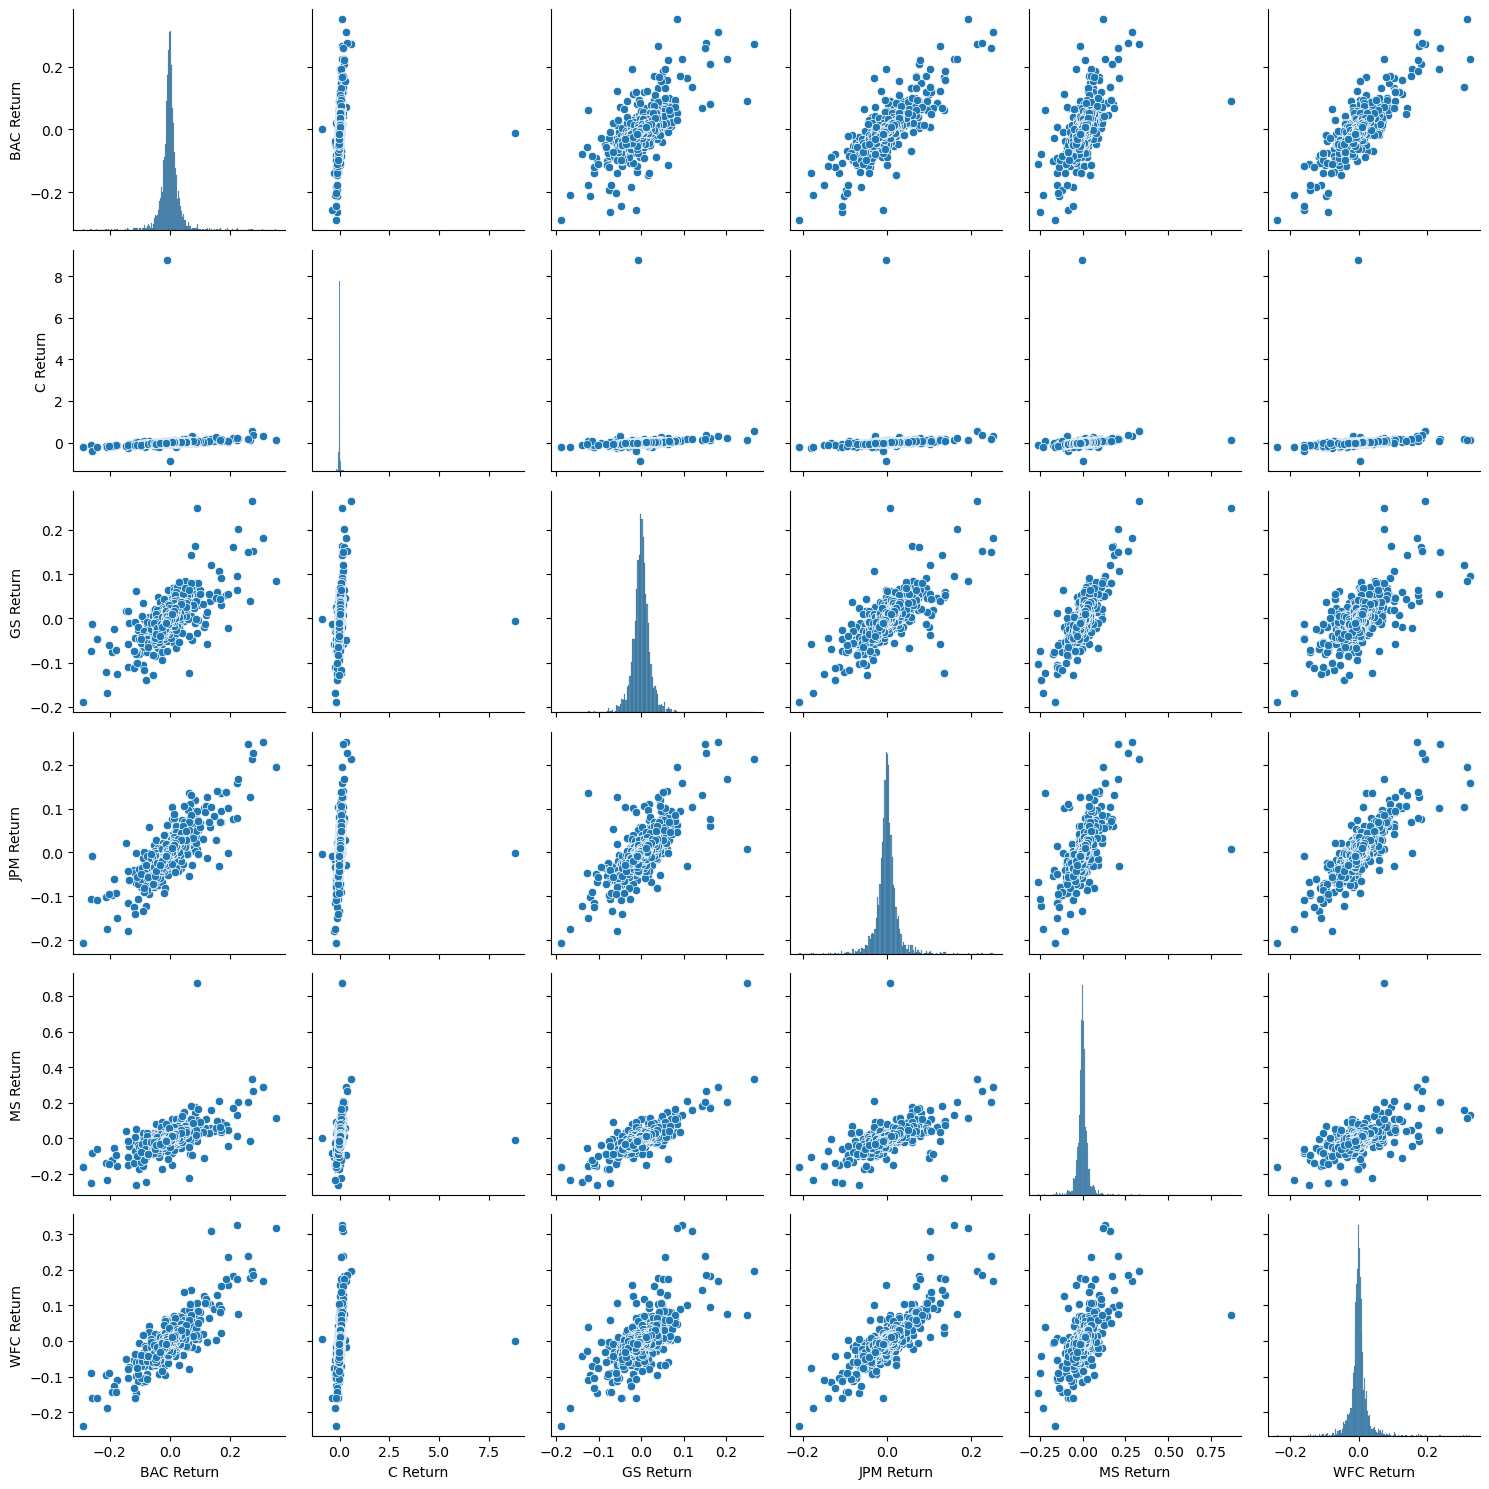

In [47]:
plt.figure(figsize=(10,5))
sns.pairplot(returns)
plt.tight_layout()
plt.show()

We can clearly see an abnormality in the financial data for Citygroup ('C'). The histogram is very spiky and compresses near zero. The scatterplot looks like a thin, vertical line rather than spread values. This shows the crash as part of the global financial crisis.

Retrieve the BEST and WORST returns dates for each bank stock

In [51]:
for ticker in tickers:
    print(ticker)
    print("BEST Return Date:", returns[returns[ticker + ' Return'] == returns[ticker + ' Return'].max()].index[0].date())
    print("WORST Return Date:", returns[returns[ticker + ' Return'] == returns[ticker + ' Return'].min()].index[0].date())
    print()

BAC
BEST Return Date: 2009-04-09
WORST Return Date: 2009-01-20

C
BEST Return Date: 2011-05-09
WORST Return Date: 2011-05-06

GS
BEST Return Date: 2008-11-24
WORST Return Date: 2009-01-20

JPM
BEST Return Date: 2009-01-21
WORST Return Date: 2009-01-20

MS
BEST Return Date: 2008-10-13
WORST Return Date: 2008-10-09

WFC
BEST Return Date: 2008-07-16
WORST Return Date: 2009-01-20



In [71]:
# Alternatively, this could be more simply achieved this way
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [70]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Most banks share the same worst return date, which is 20/01/2009. This date represents Inauguration Day of Barack Obama. 


Citigroup's best and worst days are very close, which reflects a reverse stock split.

Let's take a look at the standard deviation of the returns. Which stock could be classify as the riskiest over the entire period? and on 2015?

In [145]:
returns_std = {}

for ticker in tickers:
    std_value = returns[ticker + ' Return'].std()
    returns_std[ticker] = std_value

returns_std_df = pd.DataFrame.from_dict(returns_std, orient='index', columns=['Std_Dev'])
returns_std_df.sort_values(by='Std_Dev', ascending=False)

,Std_Dev
C,0.179969
MS,0.037820
BAC,0.036650
WFC,0.030233
JPM,0.027656
GS,0.025346


In [147]:
# Alternative, a simpler way would be:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Citigroup has by far the highest standard deviation (high volatility), and over the entire time series it would be the riskiest bank to invest on.

In [67]:
returns_2015 = returns[returns.index.year == 2015]

returns_std_2015 = {}

for ticker in tickers:
    std_value = returns_2015[ticker + ' Return'].std()
    returns_std_2015[ticker] = std_value

returns_std_2015_df = pd.DataFrame.from_dict(returns_std_2015, orient='index', columns=['Std_Dev'])
returns_std_2015_df.sort_values(by='Std_Dev', ascending=False)

,Std_Dev
MS,0.016249
BAC,0.016163
C,0.015289
GS,0.014046
JPM,0.014017
WFC,0.012591


In [74]:
# Alternative, simpler way
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In 2015, all banks had a similar profile when looking at the standard deviation. However, Morgan Stanley (MS) or Bank of America (BAC) would be the riskiest (if we had to pick one regardless of very close volatility across stocks).

### Further exploration of some significant insights

Let's further explore the return for 'MS' in 2015 to have a visual interpretation of the weather standard deviation in the returns data

<Figure size 1000x500 with 0 Axes>

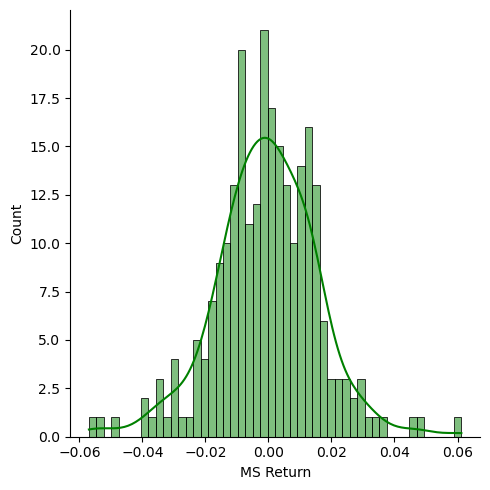

In [153]:
plt.figure(figsize=(10,5))
sns.displot(returns_2015['MS Return'], color = 'green', bins = 50, kde = True)
plt.tight_layout()
plt.show()

What we can draw from this figure is that MS has a low volatility (high stability), with return values deviating just around +- 0.06 from the average

Check the return for 'C' in 2008 to better appreciate the stock split

<Figure size 1000x500 with 0 Axes>

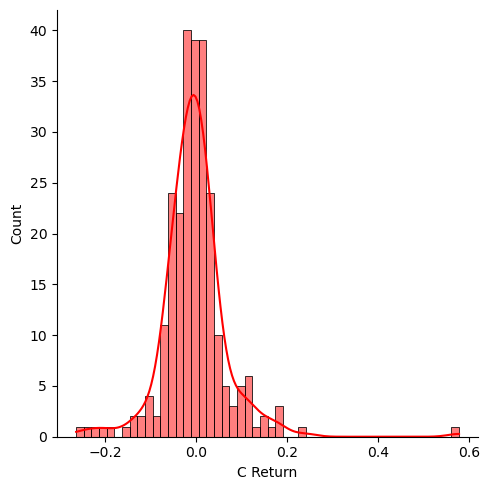

In [154]:
returns_2008 = returns[returns.index.year == 2008]
plt.figure(figsize=(10,5))
sns.displot(returns_2008['C Return'], color = 'red', bins = 50, kde = True)
plt.tight_layout()
plt.show()

Now we can see some differences with the previous stock data, demonstrating high volatility, with values deviating x10 times the return values for MS. This shows the reverse stock split behaviour we were pointing out before.

### Deeper exploration with more advance data visualitation tools

Create a line plot showing the close price for each bank for the entire time series

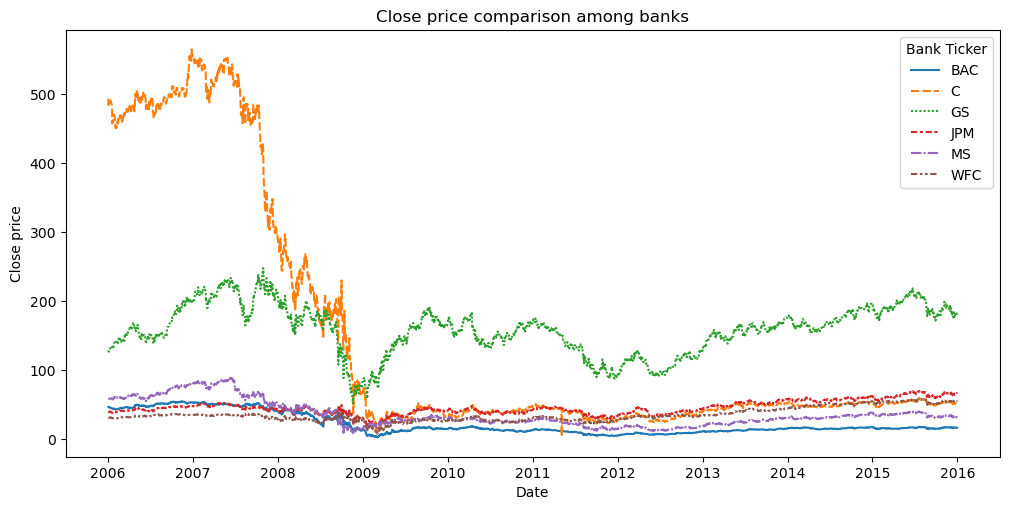

In [90]:
close_data = df.xs(key = 'Close', axis = 1, level = 'Stock Info')

plt.figure(figsize=(10,5))
sns.lineplot(close_data)
plt.tight_layout()
plt.title('Close price comparison among banks')
plt.ylabel('Close price') 
plt.show()

Let's analyse now moving averages for these stocks in the year 2008. For example, A 30-day average against Close Price for BAC.

In [159]:
df_2008 = df[df.index.year == 2008]
BAC_2008 = df_2008.xs(key = 'Close', axis = 1, level = 'Stock Info')['BAC']
BAC_2008 = BAC_2008.to_frame(name = 'Close')
BAC_2008['Rolling_30'] = BAC_2008.rolling(window = 30).mean()
BAC_2008

,Close,Rolling_30
Date,,
2008-01-02,40.56,NaN
2008-01-03,40.30,NaN
2008-01-04,39.85,NaN
2008-01-07,39.90,NaN
2008-01-08,38.41,NaN
...,...,...
2008-12-24,13.53,14.738667
2008-12-26,13.36,14.617333
2008-12-29,12.94,14.478667


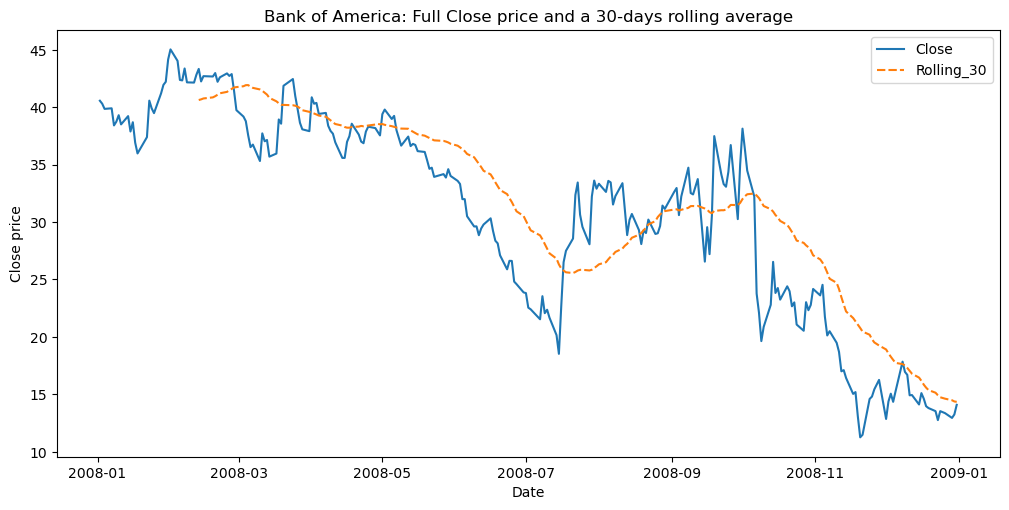

In [160]:
plt.figure(figsize=(10,5))
sns.lineplot(BAC_2008)
plt.tight_layout()
plt.title('Bank of America: Full Close price and a 30-days rolling average')
plt.ylabel('Close price') 
plt.show()

Now, let's explore the correlation betwen stocks Close Price

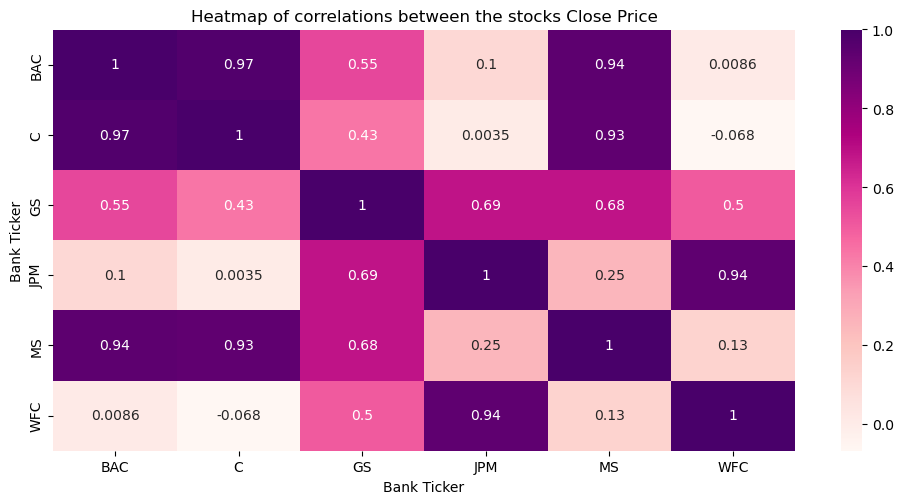

In [163]:
close_data = df.xs(key = 'Close', axis = 1, level = 'Stock Info')

plt.figure(figsize=(10,5))
sns.heatmap(close_data.corr(), annot = True, cmap='RdPu')
plt.tight_layout()
plt.title('Heatmap of correlations between the stocks Close Price')
plt.show()

<Figure size 1000x500 with 0 Axes>

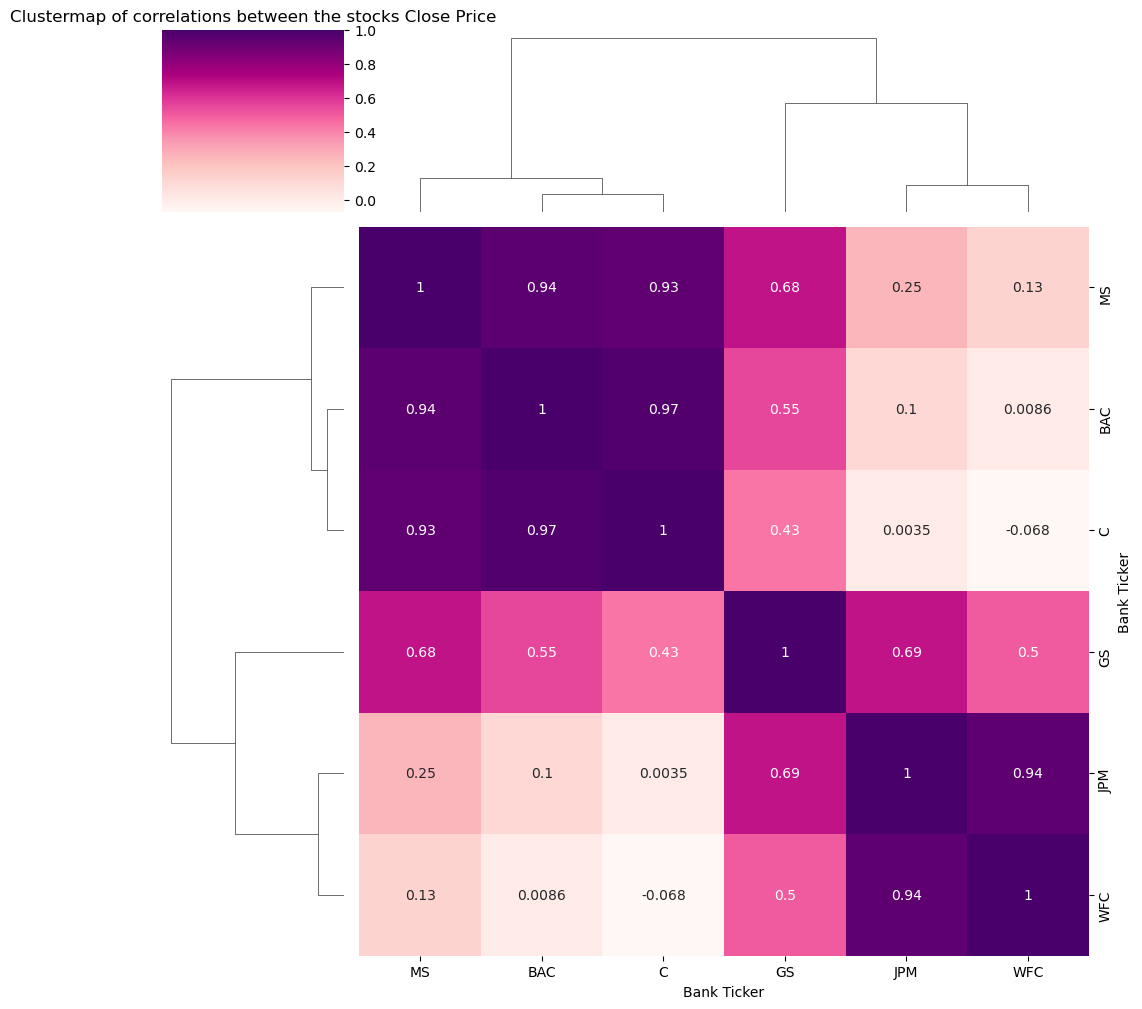

In [164]:
plt.figure(figsize=(10,5))
sns.clustermap(close_data.corr(), annot = True, cmap= 'RdPu')
plt.tight_layout()
plt.title('Clustermap of correlations between the stocks Close Price')
plt.show()

### Technical Analysis plots

Create a candle plot of Bank of America's stock between Jan 1st 2015 to Jan 1st 2016

In [124]:
# extract BAC data for 2015
BAC_2015 = df.loc['2015-01-01':'2016-01-01', ('BAC', ['Open','High','Low','Close'])]
BAC_2015.columns = ['Open','High','Low','Close']  # flatten multi-index


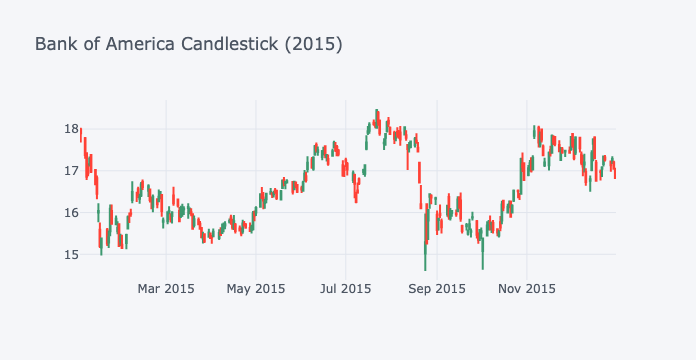

In [125]:
BAC_2015.iplot(kind='candle', title='Bank of America Candlestick (2015)')


Create a Simple Moving Average plot for Morgan Stanley for the year 2015

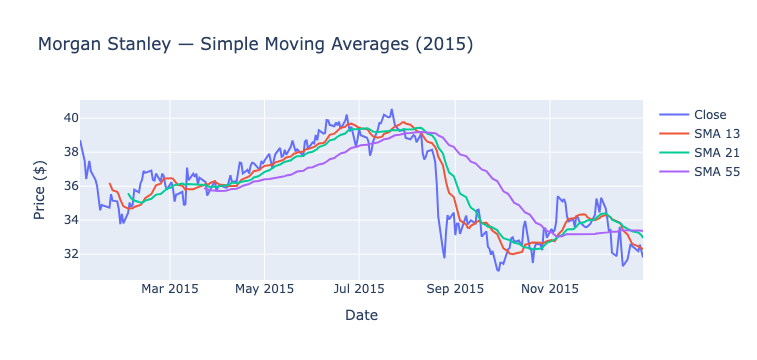

In [166]:
sma13 = MS_2015['Close'].rolling(13).mean()
sma21 = MS_2015['Close'].rolling(21).mean()
sma55 = MS_2015['Close'].rolling(55).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=MS_2015.index, y=MS_2015['Close'], name='Close'))
fig.add_trace(go.Scatter(x=MS_2015.index, y=sma13, name='SMA 13'))
fig.add_trace(go.Scatter(x=MS_2015.index, y=sma21, name='SMA 21'))
fig.add_trace(go.Scatter(x=MS_2015.index, y=sma55, name='SMA 55'))
fig.update_layout(title='Morgan Stanley — Simple Moving Averages (2015)',
                  xaxis_title='Date', yaxis_title='Price ($)')
fig.show()

Lasly, create a Bollinger Band Plot for Bank of America for the year 2015.

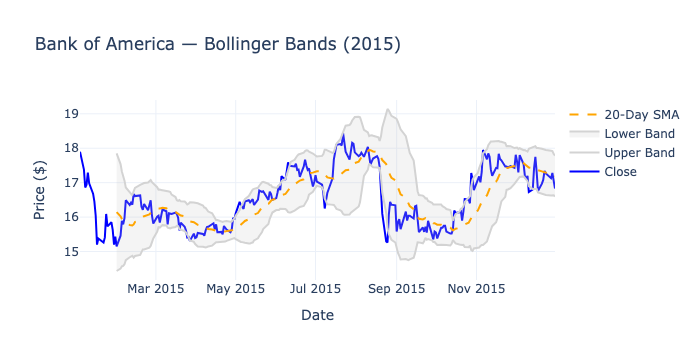

In [136]:
# 1. Extract Bank of America closing prices for 2015
BAC_close = df.loc['2015-01-01':'2016-01-01', ('BAC', 'Close')].rename('Close').to_frame()

# 2. Compute Bollinger Bands (20-day window by convention)
window = 20
BAC_close['SMA'] = BAC_close['Close'].rolling(window=window).mean()
BAC_close['STD'] = BAC_close['Close'].rolling(window=window).std()
BAC_close['Upper'] = BAC_close['SMA'] + (2 * BAC_close['STD'])
BAC_close['Lower'] = BAC_close['SMA'] - (2 * BAC_close['STD'])

# 3. Build the interactive Bollinger Band plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=BAC_close.index, y=BAC_close['Close'],
    mode='lines', name='Close', line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=BAC_close.index, y=BAC_close['Upper'],
    mode='lines', name='Upper Band', line=dict(color='lightgrey')
))
fig.add_trace(go.Scatter(
    x=BAC_close.index, y=BAC_close['Lower'],
    mode='lines', name='Lower Band', line=dict(color='lightgrey'),
    fill='tonexty', fillcolor='rgba(200,200,200,0.2)'  # fills between bands
))
fig.add_trace(go.Scatter(
    x=BAC_close.index, y=BAC_close['SMA'],
    mode='lines', name=f'{window}-Day SMA', line=dict(color='orange', dash='dash')
))

fig.update_layout(
    title='Bank of America — Bollinger Bands (2015)',
    xaxis_title='Date',
    yaxis_title='Price ($)',
    template='plotly_white'
)

fig.show()